In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB, GaussianNB 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, matthews_corrcoef
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import string

In [2]:
path= os.getcwd()

In [3]:
data= pd.read_excel(str(path)+'//Participants_Data_News_category//Data_Train.xlsx')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628 entries, 0 to 7627
Data columns (total 2 columns):
STORY      7628 non-null object
SECTION    7628 non-null int64
dtypes: int64(1), object(1)
memory usage: 119.3+ KB


In [5]:
#Calcuating length with chg
data['len']= data['STORY'].apply(lambda x: len(x))

In [6]:
data.describe()

,SECTION,len
count,7628.000000,7628.000000
mean,1.357892,651.239381
std,0.999341,521.631877
min,0.000000,100.000000
25%,1.000000,314.000000
50%,1.000000,534.000000
75%,2.000000,833.250000
max,3.000000,6015.000000


In [7]:
data['SECTION'].value_counts()

1    2772
2    1924
0    1686
3    1246
Name: SECTION, dtype: int64

In [8]:
data['STORY_processed'] = data.STORY.str.replace('[{}]'.format(string.punctuation), '').str.lower()

In [9]:
def create_wordcloud(category):
    text = " ".join(desc for desc in category['STORY_processed'])
    wordcloud = WordCloud(width=1500, height=800, max_font_size=200, background_color = 'white', stopwords = STOPWORDS).generate(text)
    plt.figure(figsize=(20,15))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

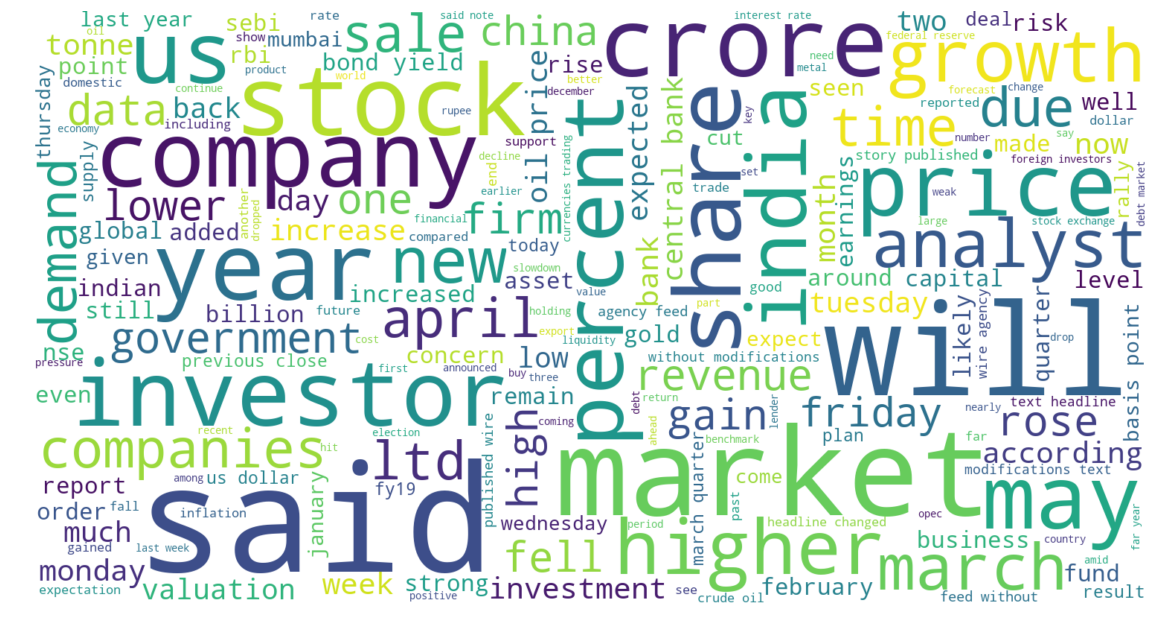

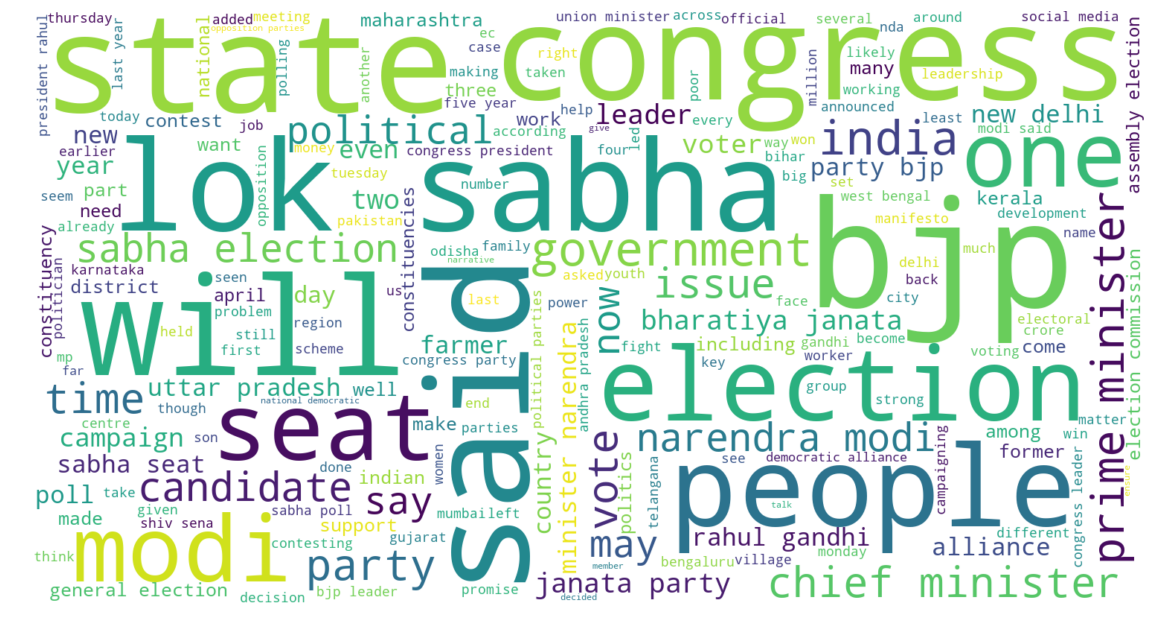

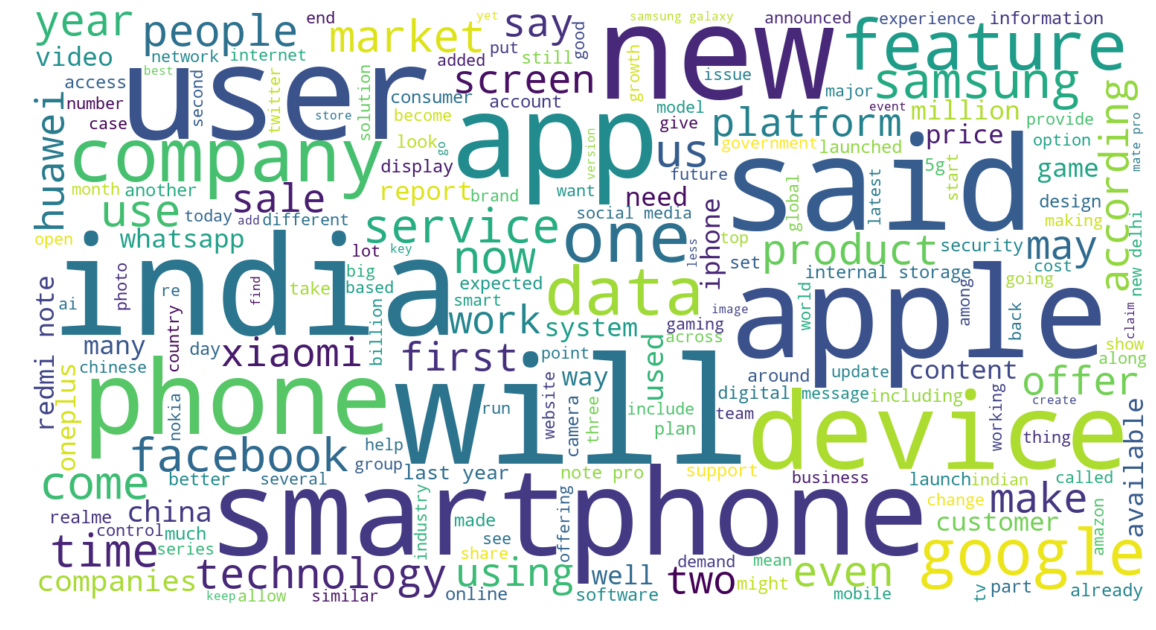

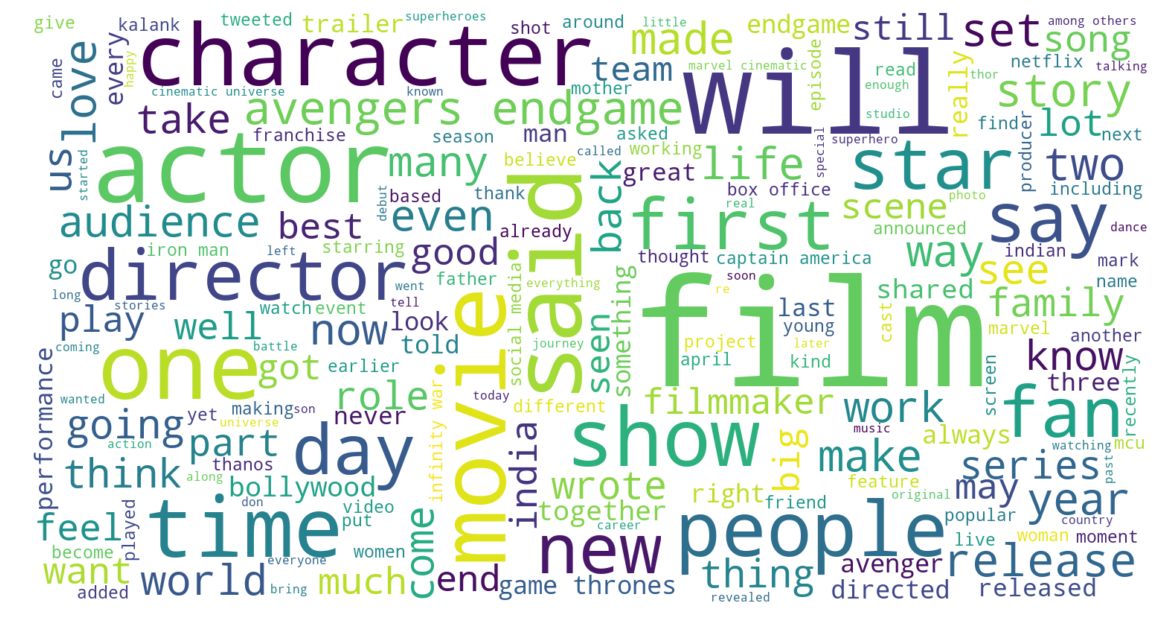

In [10]:
for i in data['SECTION'].unique():
    create_wordcloud(data[data['SECTION']==i])

In [11]:
x_train, x_test, y_train, y_test = train_test_split(data['STORY_processed'], data['SECTION'],test_size=0.2,
                                                    random_state=555)

In [12]:
counter = TfidfVectorizer(stop_words='english')

x_train_processed = counter.fit_transform(x_train)
x_test_processed = counter.transform(x_test)

In [16]:
from sklearn.svm import LinearSVC, NuSVC

classifier = LinearSVC(class_weight='balanced')

classifier.fit(x_train_processed, y_train)

y_pred = classifier.predict(x_test_processed)

In [17]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       348
           1       0.99      0.98      0.98       555
           2       0.97      0.99      0.98       387
           3       0.97      0.98      0.97       236

   micro avg       0.98      0.98      0.98      1526
   macro avg       0.98      0.98      0.98      1526
weighted avg       0.98      0.98      0.98      1526



In [18]:
matthews_corrcoef(y_test, y_pred)

0.9730160087254226

In [19]:
# We will repeat the same procedur by including stemming and lemmatization
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
# lemmatizing...
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()
porter_stemmer = PorterStemmer()
stopwords = set(stopwords.words('english'))

def stemming_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
#     words = [porter_stemmer.stem(word) if word not in stopwords else word for word in words]
    words = [porter_stemmer.stem(word) for word in words if word not in stopwords]
    words = ' '.join(words)
    return words

def lemmetizer_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
#     words = [wordnet_lemmatizer.lemmatize(word) if word not in stopwords else word for word in words]
    words = [wordnet_lemmatizer.lemmatize(word) for word in words if word not in stopwords]

    words = ' '.join(words)
    return words         

In [20]:
data['STORY_stemmed'] = data['STORY'].apply(lambda x: stemming_tokenizer(x))
data['STORY_stemmed_lemmetized'] = data['STORY_stemmed'].apply(lambda x: lemmetizer_tokenizer(x))
data['STORY_lemmetized'] = data['STORY'].apply(lambda x: lemmetizer_tokenizer(x))

In [21]:
data['STORY_stemmed_lemmetized'].head()

0    pain huge revers fee incom unheard among priva...
1    formid opposit allianc among congress jharkhan...
2    asian currenc trade lower today south korean 0...
3    want answer question click answer click answer...
4    global market gold price edg today disappoint ...
Name: STORY_stemmed_lemmetized, dtype: object

In [22]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(data['STORY_stemmed_lemmetized'], data['SECTION'],test_size=0.2,
                                                    random_state=555)

In [23]:
counter = TfidfVectorizer(stop_words='english')

x_train_processed_1 = counter.fit_transform(x_train1)
x_test_processed_1 = counter.transform(x_test1)

In [24]:
from sklearn.svm import LinearSVC, NuSVC

classifier = LinearSVC(penalty='l2', dual=False, class_weight='balanced')
classifier.fit(x_train_processed_1, y_train1)

y_pred1 = classifier.predict(x_test_processed_1)


In [25]:
matthews_corrcoef(y_test, y_pred)
# 0.9729934732652387


0.9730160087254226

In [79]:
#Getting the test data and performing pre-processing steps
testdata= pd.read_excel(str(path)+'//Participants_Data_News_category//Data_Test.xlsx')

In [80]:
testdata['STORY_processed'] = testdata.STORY.str.replace('[{}]'.format(string.punctuation), '').str.lower()

In [81]:
testdata['STORY_stemmed'] = testdata['STORY_processed'].apply(lambda x: stemming_tokenizer(x))
testdata['STORY_stemmed_lemmetized'] = testdata['STORY_stemmed'].apply(lambda x: lemmetizer_tokenizer(x))
testdata['STORY_lemmetized'] = testdata['STORY_processed'].apply(lambda x: lemmetizer_tokenizer(x))

In [82]:
testdata['STORY_stemmed_lemmetized'].head()

0    2019 see gadget like game smartphon wearabl me...
1    also unleash wave chang mcu make sure futur lo...
2    confus pick right smartphon segreg top smartph...
3    mobil applic integr dashboard confirm regist p...
4    round gadget show 2018 left indel mark consum ...
Name: STORY_stemmed_lemmetized, dtype: object

In [83]:
testdata_processed = counter.transform(testdata['STORY_stemmed_lemmetized'])

In [84]:
y_testdata = classifier.predict(testdata_processed)

In [85]:
submission=pd.DataFrame(data= y_testdata, columns=['SECTION'],index=None)

In [86]:
submission.head()

,SECTION
0,1
1,2
2,1
3,1
4,1


In [87]:
submission.to_excel('submission2.xlsx', index=False)